Train score= 1.0
Test score= 0.9111111111111111


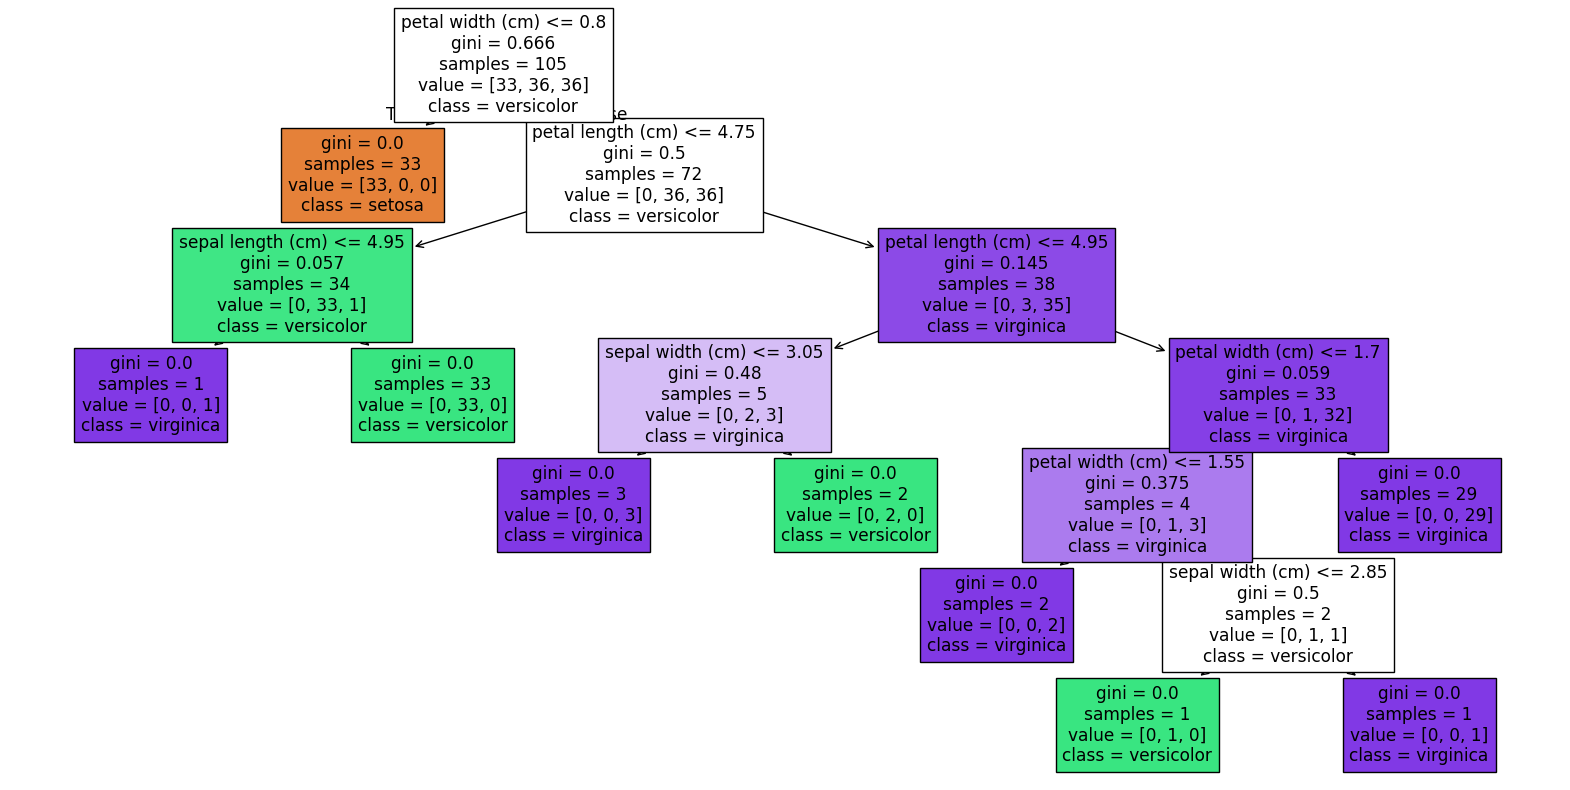

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
df=load_iris()
x=df.data
y=df.targeta
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_stte=3)
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
print('Train score=', dt.score(x_train,y_train))
print('Test score=', dt.score(x_test,y_test))

x_new=np.array([0.3,0.5,2,6]).reshape(1,4)
dt.predict(x_new)

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=df.feature_names, class_names=df.target_names, filled=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'criterion' : ['gini','entropy'],
    'max_depth': np.arange(1,10)
}
grid= GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid, cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [ ]:
final_model=DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=3)
final_model.fit(x_train,y_train)
DecisionTreeClassifier(max_depth=2, random_state=0)
print('test_score= ', final_model.score(x_test, y_test))

test_score=  0.9111111111111111


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(max_depth=2, n_estimators=50, criterion='gini')
classifier.fit(x_train,y_train)
train_score=classifier.score(x_train,y_train)
print(train_score)
test_score=classifier.score(x_test,y_test)
print(test_score)

0.9714285714285714
0.9555555555555556


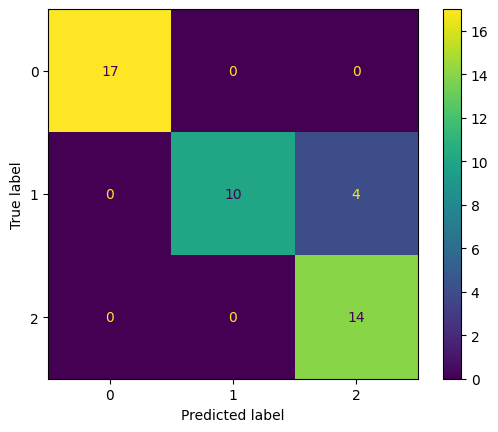

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Entraînement du classificateur
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train, y_train)

# Affichage de la matrice de confusion
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)
